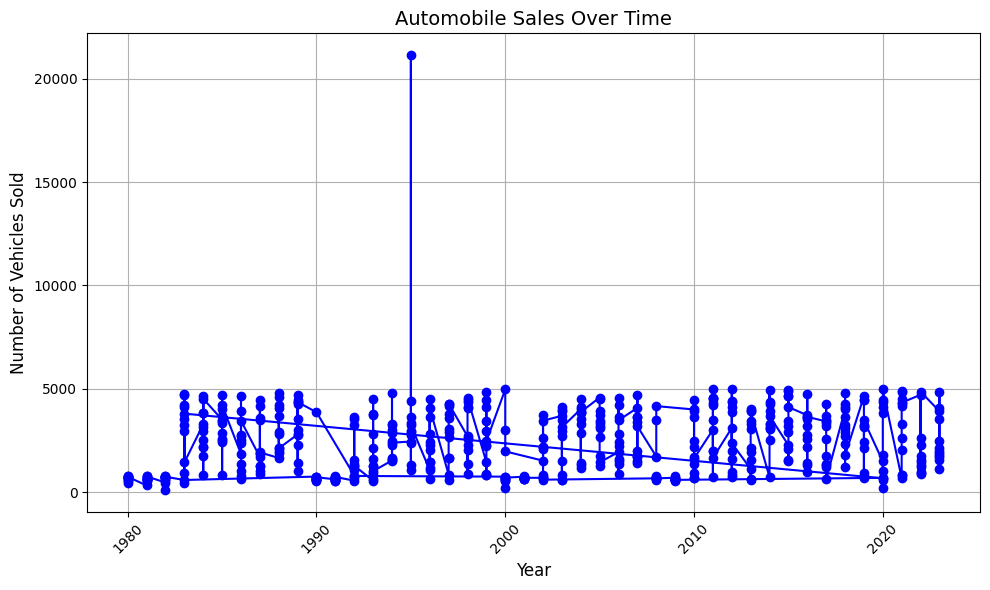

In [1]:
# Step 1: Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Loading the dataset
# Assuming you have a CSV file, use pandas to load it
df = pd.read_csv('historical_automobile_sales.csv')  # Change this to your dataset's path

# Step 3: Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Automobile_Sales'], color='blue', marker='o')
plt.title('Automobile Sales Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Vehicles Sold', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


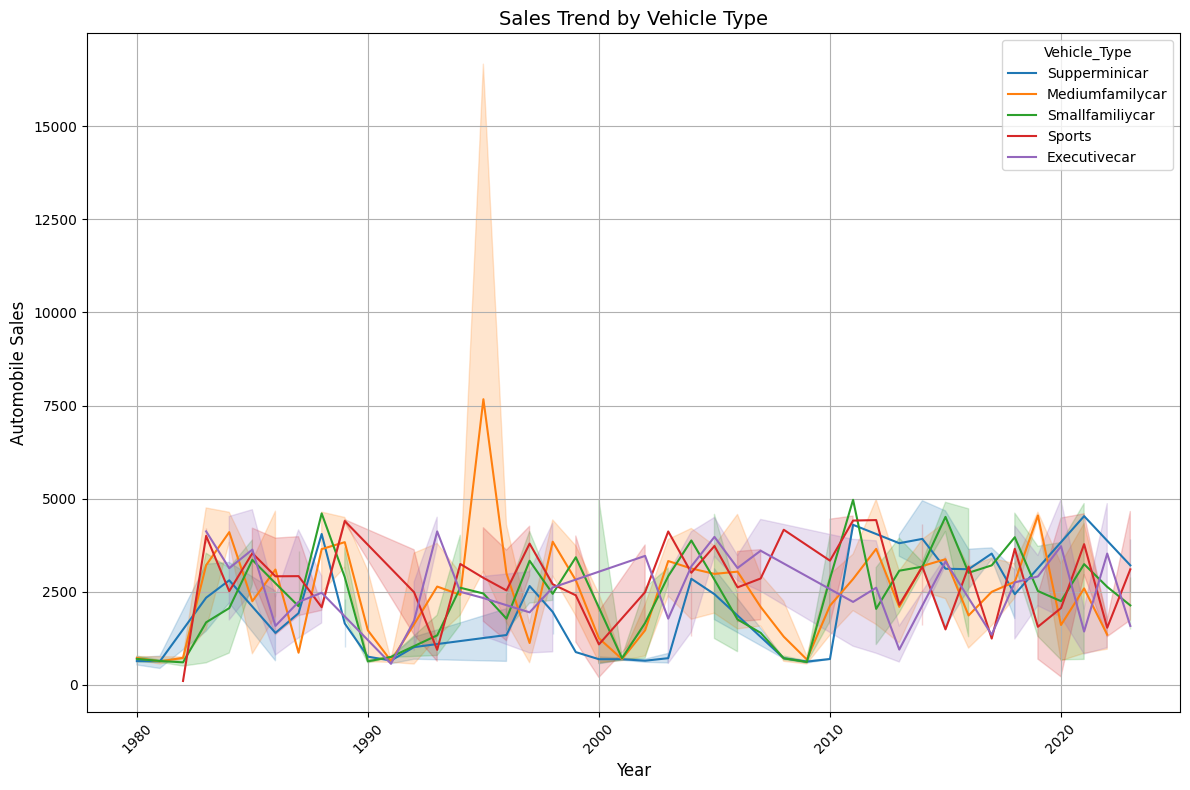

In [2]:
# Step 1: Import necessary libraries
import seaborn as sns

# Step 2: Plotting the sales trend for each vehicle type
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', markers=True)

plt.title('Sales Trend by Vehicle Type', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


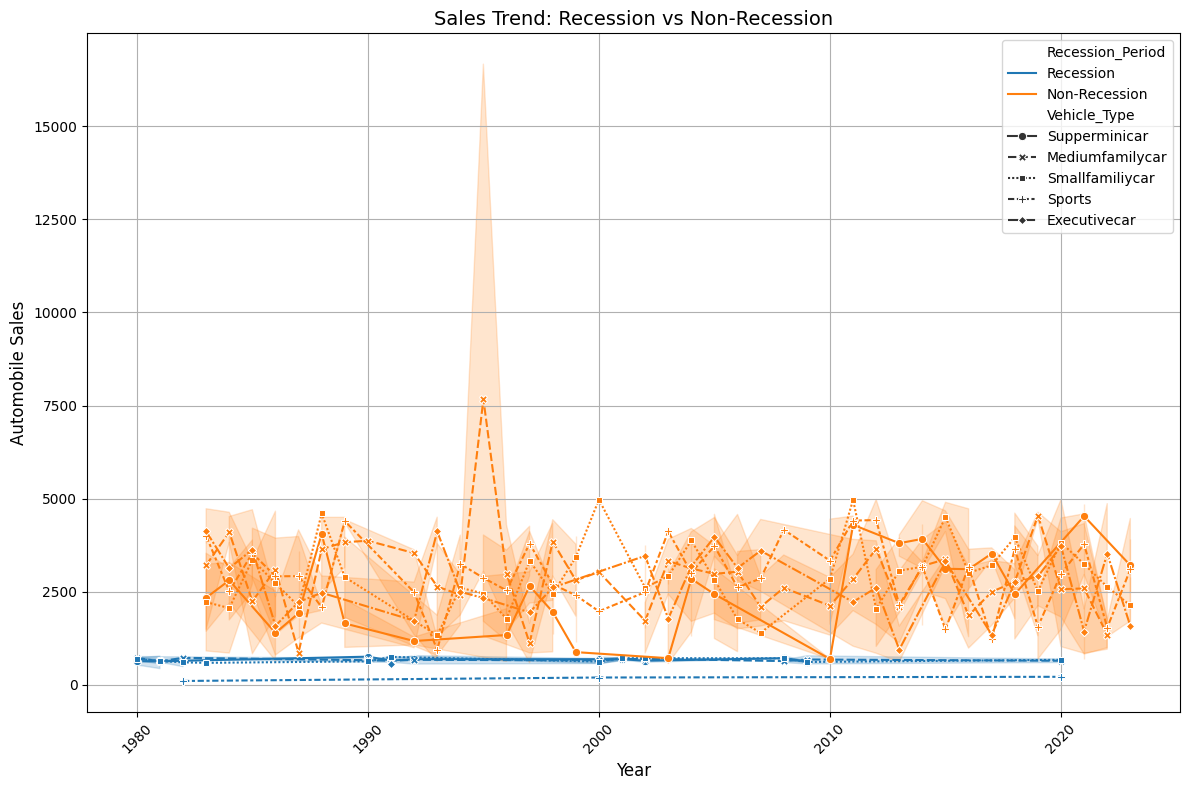

In [3]:
# Step 1: Creating a new column for Recession vs Non-Recession
df['Recession_Period'] = df['Recession'].map({0: 'Non-Recession', 1: 'Recession'})

# Step 2: Plotting sales trend comparing recession vs non-recession period
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Recession_Period', style='Vehicle_Type', markers=True)

plt.title('Sales Trend: Recession vs Non-Recession', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


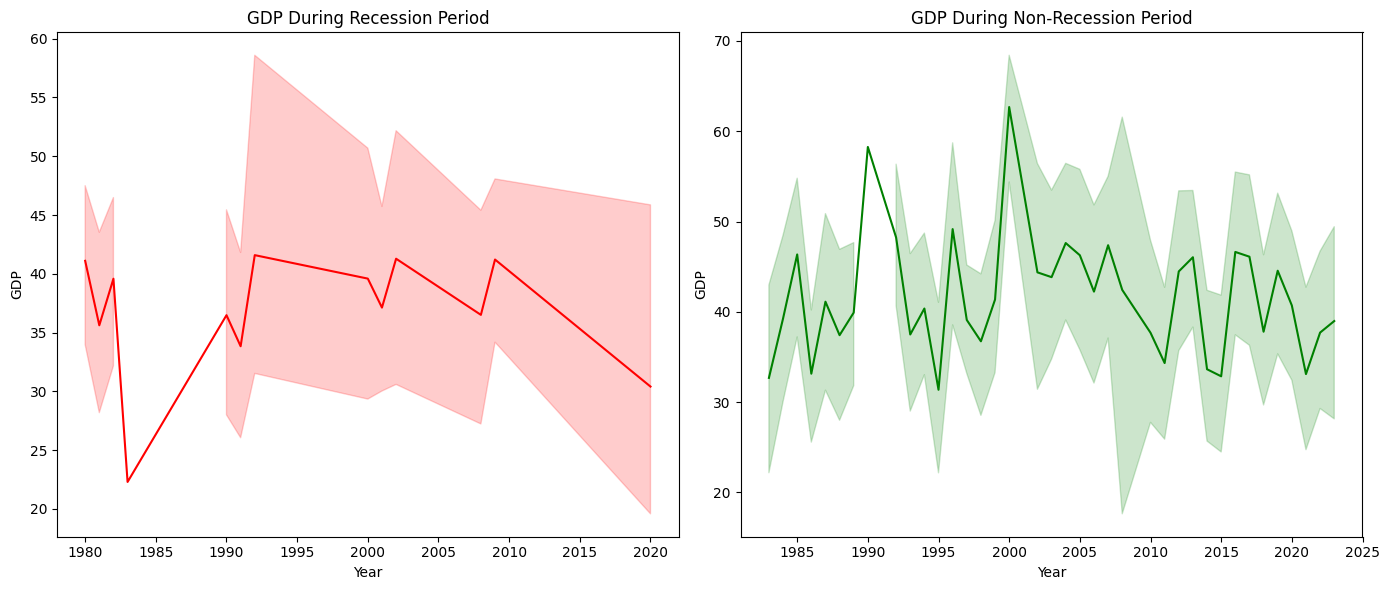

In [4]:
# Step 1: Subplotting to compare GDP during recession vs non-recession periods
plt.figure(figsize=(14, 6))

# Subplot for GDP during Recession
plt.subplot(1, 2, 1)
sns.lineplot(data=df[df['Recession'] == 1], x='Year', y='GDP', color='red')
plt.title('GDP During Recession Period', fontsize=12)
plt.xlabel('Year')
plt.ylabel('GDP')

# Subplot for GDP during Non-Recession
plt.subplot(1, 2, 2)
sns.lineplot(data=df[df['Recession'] == 0], x='Year', y='GDP', color='green')
plt.title('GDP During Non-Recession Period', fontsize=12)
plt.xlabel('Year')
plt.ylabel('GDP')

plt.tight_layout()
plt.show()


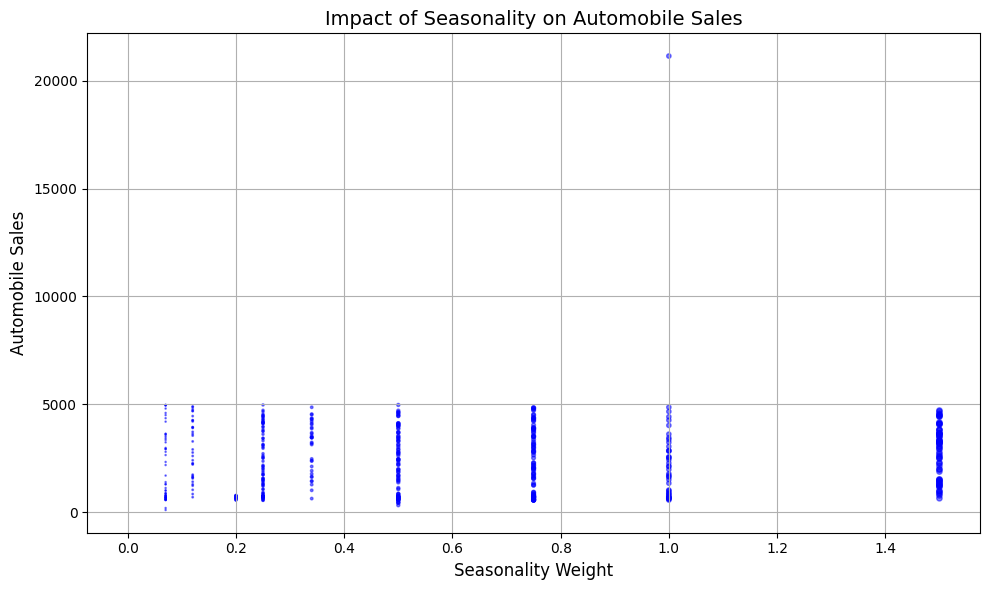

In [5]:
# Step 1: Plotting a bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Seasonality_Weight'], df['Automobile_Sales'], s=df['Seasonality_Weight']*10, alpha=0.5, color='blue')

plt.title('Impact of Seasonality on Automobile Sales', fontsize=14)
plt.xlabel('Seasonality Weight', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


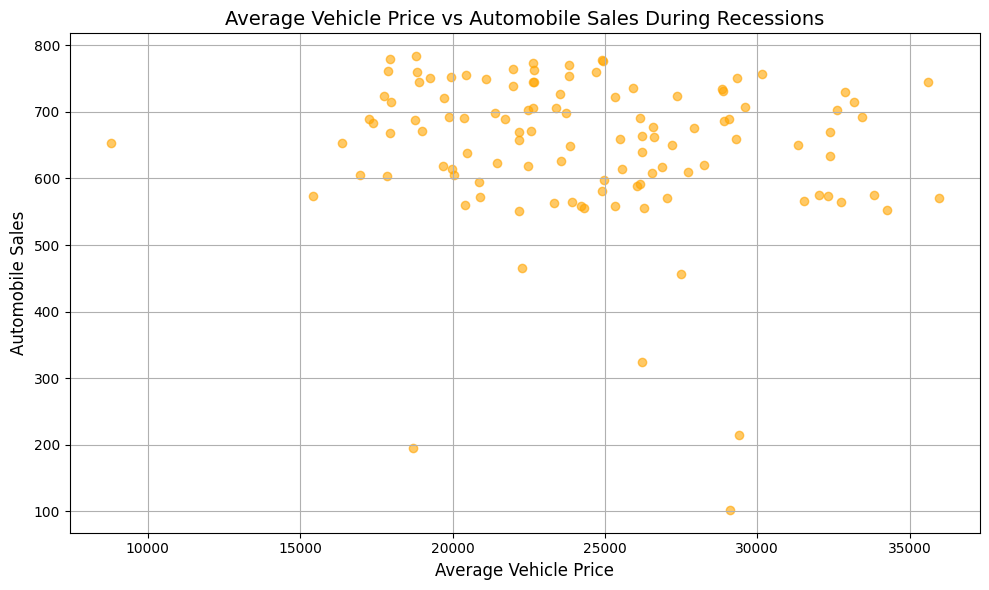

In [6]:
# Step 1: Filter data for recession periods only
recession_df = df[df['Recession'] == 1]

# Step 2: Plotting the scatter plot for Price vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(recession_df['Price'], recession_df['Automobile_Sales'], alpha=0.6, color='orange')

plt.title('Average Vehicle Price vs Automobile Sales During Recessions', fontsize=14)
plt.xlabel('Average Vehicle Price', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


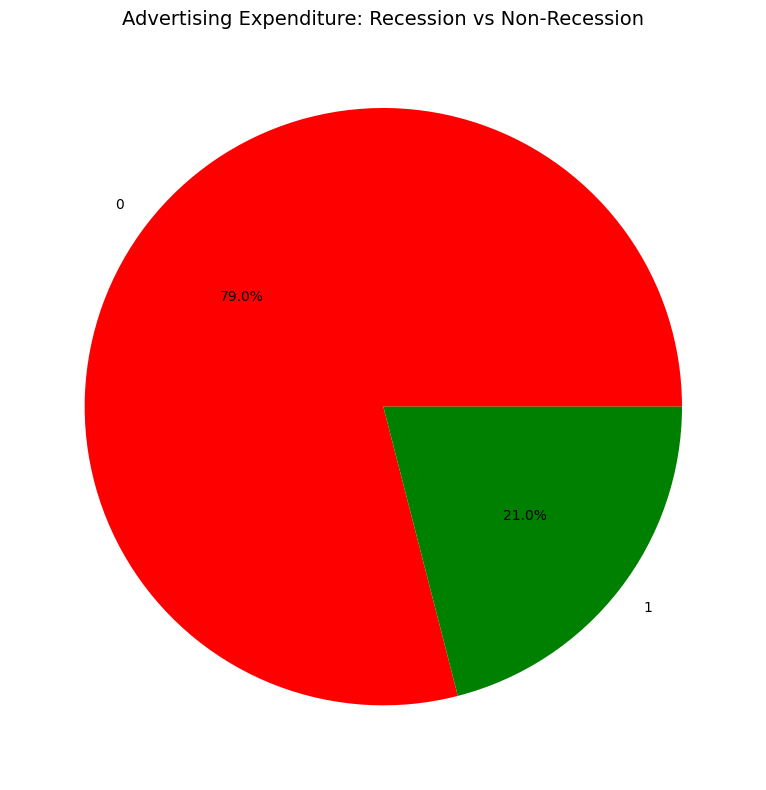

In [7]:
# Step 1: Summing up the Advertising Expenditure for Recession and Non-Recession periods
ad_expenditure = df.groupby('Recession')['Advertising_Expenditure'].sum()

# Step 2: Plotting the pie chart
plt.figure(figsize=(8, 8))
ad_expenditure.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Advertising Expenditure: Recession vs Non-Recession', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


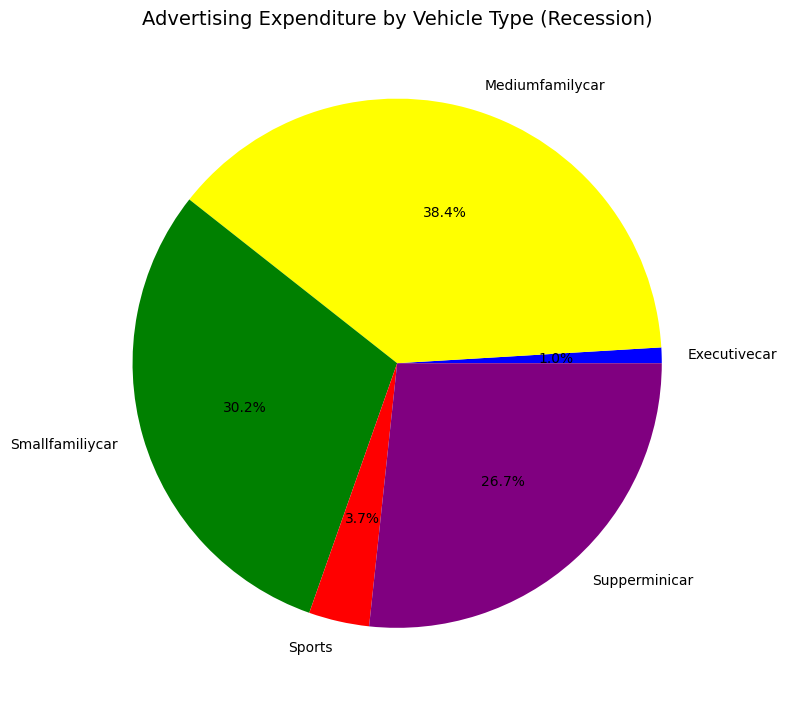

In [8]:
# Step 1: Filter data for recession periods only
recession_df = df[df['Recession'] == 1]

# Step 2: Grouping by Vehicle Type and summing the Advertising Expenditure
ad_by_vehicle = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Step 3: Plotting the pie chart
plt.figure(figsize=(8, 8))
ad_by_vehicle.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'yellow', 'green', 'red', 'purple'])
plt.title('Advertising Expenditure by Vehicle Type (Recession)', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


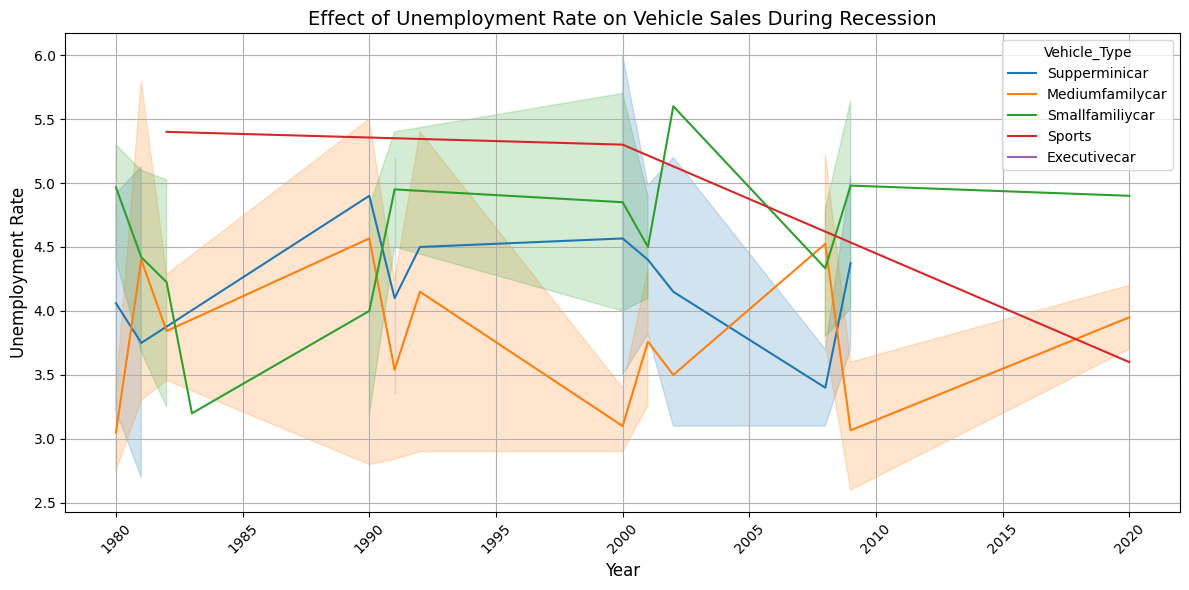

In [13]:
# Step 1: Filter data for recession periods
recession_df = df[df['Recession'] == 1]

# Step 2: Plotting the lineplot for Unemployment Rate vs Vehicle Type
plt.figure(figsize=(12, 6))
sns.lineplot(data=recession_df, x='Year', y='unemployment_rate', hue='Vehicle_Type', markers=True)

plt.title('Effect of Unemployment Rate on Vehicle Sales During Recession', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
!pip install dash
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [19]:
# Importing required libraries
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load the dataset
df = pd.read_csv('historical_automobile_sales.csv')  # Use the correct file path

# Initialize Dash application
app = dash.Dash(__name__)

# App layout (structure of the dashboard)
app.layout = html.Div(children=[
    html.H1("HMR Automotives Sales Dashboard", style={'text-align': 'center'}),

    # Dropdown for selecting vehicle type
    dcc.Dropdown(
        id='vehicle-type-dropdown',
        options=[
            {'label': 'Superminicar', 'value': 'Superminicar'},
            {'label': 'Smallfamilycar', 'value': 'Smallfamilycar'},
            {'label': 'Mediumfamilycar', 'value': 'Mediumfamilycar'},
            {'label': 'Executivecar', 'value': 'Executivecar'},
            {'label': 'Sports', 'value': 'Sports'}
        ],
        value='Superminicar',  # Default value
        style={'width': '50%', 'margin': '20px auto'}
    ),

    # Dropdown for selecting recession period
    dcc.Dropdown(
        id='recession-period-dropdown',
        options=[
            {'label': 'Recession', 'value': 1},
            {'label': 'Non-Recession', 'value': 0}
        ],
        value=0,  # Default value (Non-Recession)
        style={'width': '50%', 'margin': '20px auto'}
    ),

    # Graph output
    dcc.Graph(id='sales-trend-graph')
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [20]:
# Callback to update the graph based on dropdown inputs
@app.callback(
    Output('sales-trend-graph', 'figure'),
    [Input('vehicle-type-dropdown', 'value'),
     Input('recession-period-dropdown', 'value')]
)
def update_graph(selected_vehicle_type, selected_recession_period):
    # Filter data based on user inputs
    filtered_df = df[(df['Vehicle_Type'] == selected_vehicle_type) & (df['Recession'] == selected_recession_period)]

    # Create a plotly line plot for the selected data
    fig = px.line(filtered_df, x='Year', y='Automobile_Sales', title=f'Sales Trend: {selected_vehicle_type} - Recession: {selected_recession_period}')
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Number of Vehicles Sold'
    )

    return fig


In [21]:
# Dropdown for selecting a year
dcc.Dropdown(
    id='year-dropdown',
    options=[{'label': str(year), 'value': year} for year in df['Year'].unique()],
    value=df['Year'].min(),  # Default value is the earliest year
    style={'width': '50%', 'margin': '20px auto'}
)


Dropdown(options=[{'label': '1980', 'value': 1980}, {'label': '1981', 'value': 1981}, {'label': '1982', 'value': 1982}, {'label': '1983', 'value': 1983}, {'label': '1990', 'value': 1990}, {'label': '1991', 'value': 1991}, {'label': '1992', 'value': 1992}, {'label': '2000', 'value': 2000}, {'label': '2001', 'value': 2001}, {'label': '2002', 'value': 2002}, {'label': '2008', 'value': 2008}, {'label': '2009', 'value': 2009}, {'label': '2020', 'value': 2020}, {'label': '1984', 'value': 1984}, {'label': '1985', 'value': 1985}, {'label': '1986', 'value': 1986}, {'label': '1987', 'value': 1987}, {'label': '1988', 'value': 1988}, {'label': '1989', 'value': 1989}, {'label': '1993', 'value': 1993}, {'label': '1994', 'value': 1994}, {'label': '1995', 'value': 1995}, {'label': '1996', 'value': 1996}, {'label': '1997', 'value': 1997}, {'label': '1998', 'value': 1998}, {'label': '1999', 'value': 1999}, {'label': '2003', 'value': 2003}, {'label': '2004', 'value': 2004}, {'label': '2005', 'value': 200

In [22]:
# Callback to update graph based on year and vehicle type selection
@app.callback(
    Output('sales-trend-graph', 'figure'),
    [Input('vehicle-type-dropdown', 'value'),
     Input('recession-period-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_graph(selected_vehicle_type, selected_recession_period, selected_year):
    # Filter data based on user inputs
    filtered_df = df[(df['Vehicle_Type'] == selected_vehicle_type) &
                     (df['Recession'] == selected_recession_period) &
                     (df['Year'] == selected_year)]

    # Create the line plot
    fig = px.line(filtered_df, x='Month', y='Automobile_Sales', title=f'Sales Trend for {selected_vehicle_type} in {selected_year}')
    fig.update_layout(
        xaxis_title='Month',
        yaxis_title='Number of Vehicles Sold'
    )

    return fig
